**Common Functions**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_orb_detector(nfeatures=500):
    #implementation here
    orb = cv2.ORB_create(nfeatures=nfeatures)
    return orb

In [3]:
def match_features(descriptor1, descriptor2):
    # implementation here
    # 1. Initialize the matcher - consider using BFMatcher or FLANN Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # 2. Match the descriptors from both sets of features
    matches = bf.match(descriptor1,descriptor2)
    # 3. Sort the matches based on their distance to get better matches first
    sorted_matches = sorted(matches, key=lambda x: x.distance)
    # 4. Return the sorted list of matches
    return sorted_matches


**Exercise 1**

In [71]:
def detect_keypoints(image_path, orb_detector):
    
  #implementation here
  # 1. Load the image from the specified path
  image = cv2.imread(image_path)
  # 2. Use the ORB detector to detect keypoints in the image
  keypoints, descriptors = orb_detector.detectAndCompute(image, None)
  # 3. Draw the keypoints on the image for visualization
  image_with_keypoints = cv2.drawKeypoints(image, keypoints, None,color=(0, 0, 255))
  # 4. Return the keypoints and the image with keypoints drawn
  return keypoints, descriptors, image_with_keypoints

**Exercise 2**

In [72]:
def match_images(image_path1, image_path2, orb_detector):
    # 1. Detect keypoints and descriptors in both images using the ORB detector
    keypoints1, descriptors1, image_with_keypoints1 = detect_keypoints(image_path1,orb_detector)
    keypoints2, descriptors2, image_with_keypoints2 =detect_keypoints(image_path2,orb_detector)
    # 2. Use a matcher (like FLANN) to find matches between descriptors of both images
    sorted_matches = match_features(descriptors1, descriptors2)
    # 3. Draw the matches on a combined image showing both input images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    image_with_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, sorted_matches, None, matchColor=(0,0,255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    # 4. Return the image with matches drawn
    return image_with_matches


**Exercise 3**

In [6]:
def plot_images(*imgs, figsize=(30,20), hide_ticks=False):
    '''Display one or multiple images.'''
    f = plt.figure(figsize=figsize)
    n = len(imgs)
    width = int(np.ceil(np.sqrt(n)))
    height = int(np.ceil(n / width))
    for i, img in enumerate(imgs, 1):
        ax = f.add_subplot(height, width, i)
        if hide_ticks:
            ax.axis('off')
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [66]:
def compare_orb_performance(image_path1,image_path2 ,orb_detector):
    # implementation here here
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    # Key steps:
    # 1. Apply different conditions to the image (like changing brightness, adding noise, or blurring)
    imageblur1 = cv2.GaussianBlur(image1, (int(15), int(15)), 0)
    imageblur2 = cv2.GaussianBlur(image2, (int(15), int(15)), 0)
    
    imageblur1 = cv2.convertScaleAbs(image1, alpha=0.3, beta=0.1)
    imageblur2 = cv2.convertScaleAbs(image2, alpha=0.3, beta=0.1)
    # 2. Detect features using ORB for each altered image
    keypoints1, descriptors1 = orb_detector.detectAndCompute(imageblur1, None)
    image_with_keypoints = cv2.drawKeypoints(imageblur1, keypoints, None,color=(255, 255, 255))
    
    keypoints2, descriptors2 = orb_detector.detectAndCompute(imageblur2, None)
    image_with_keypoints_colour = cv2.drawKeypoints(imageblur2, keypoints, None,color=(255, 255, 255))


    # Use a matcher (like FLANN) to find matches between descriptors of both images
    sorted_matches = match_features(descriptors1, descriptors2)[:10]

    image_with_matches = cv2.drawMatches(imageblur1, keypoints1, imageblur2, keypoints2, sorted_matches, None, matchColor=(0,0,255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    # 4. Return the image with matches drawn
   
    plt.figure(figsize=(30,20))
    plt.imshow(cv2.cvtColor(image_with_matches, cv2.COLOR_BGR2RGB))
    plt.show()



**Exercise 1**

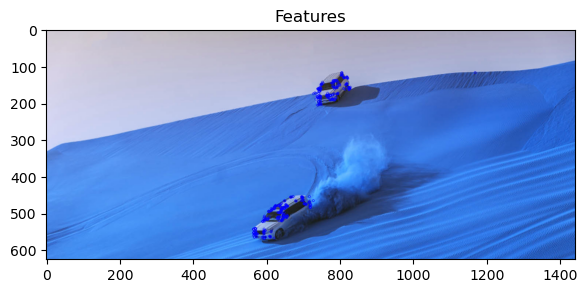

In [8]:
orb = create_orb_detector(nfeatures=500)
keypoints, descriptors, image_with_keypoints = detect_keypoints('Best_Cars_for_Desert_Driving_12022021.jpg',orb)
plt.figure(figsize=(15, 7))
plt.subplot(122), plt.imshow(image_with_keypoints), plt.title('Features')
plt.show()

**Exercise 2**

**Exercise 3**

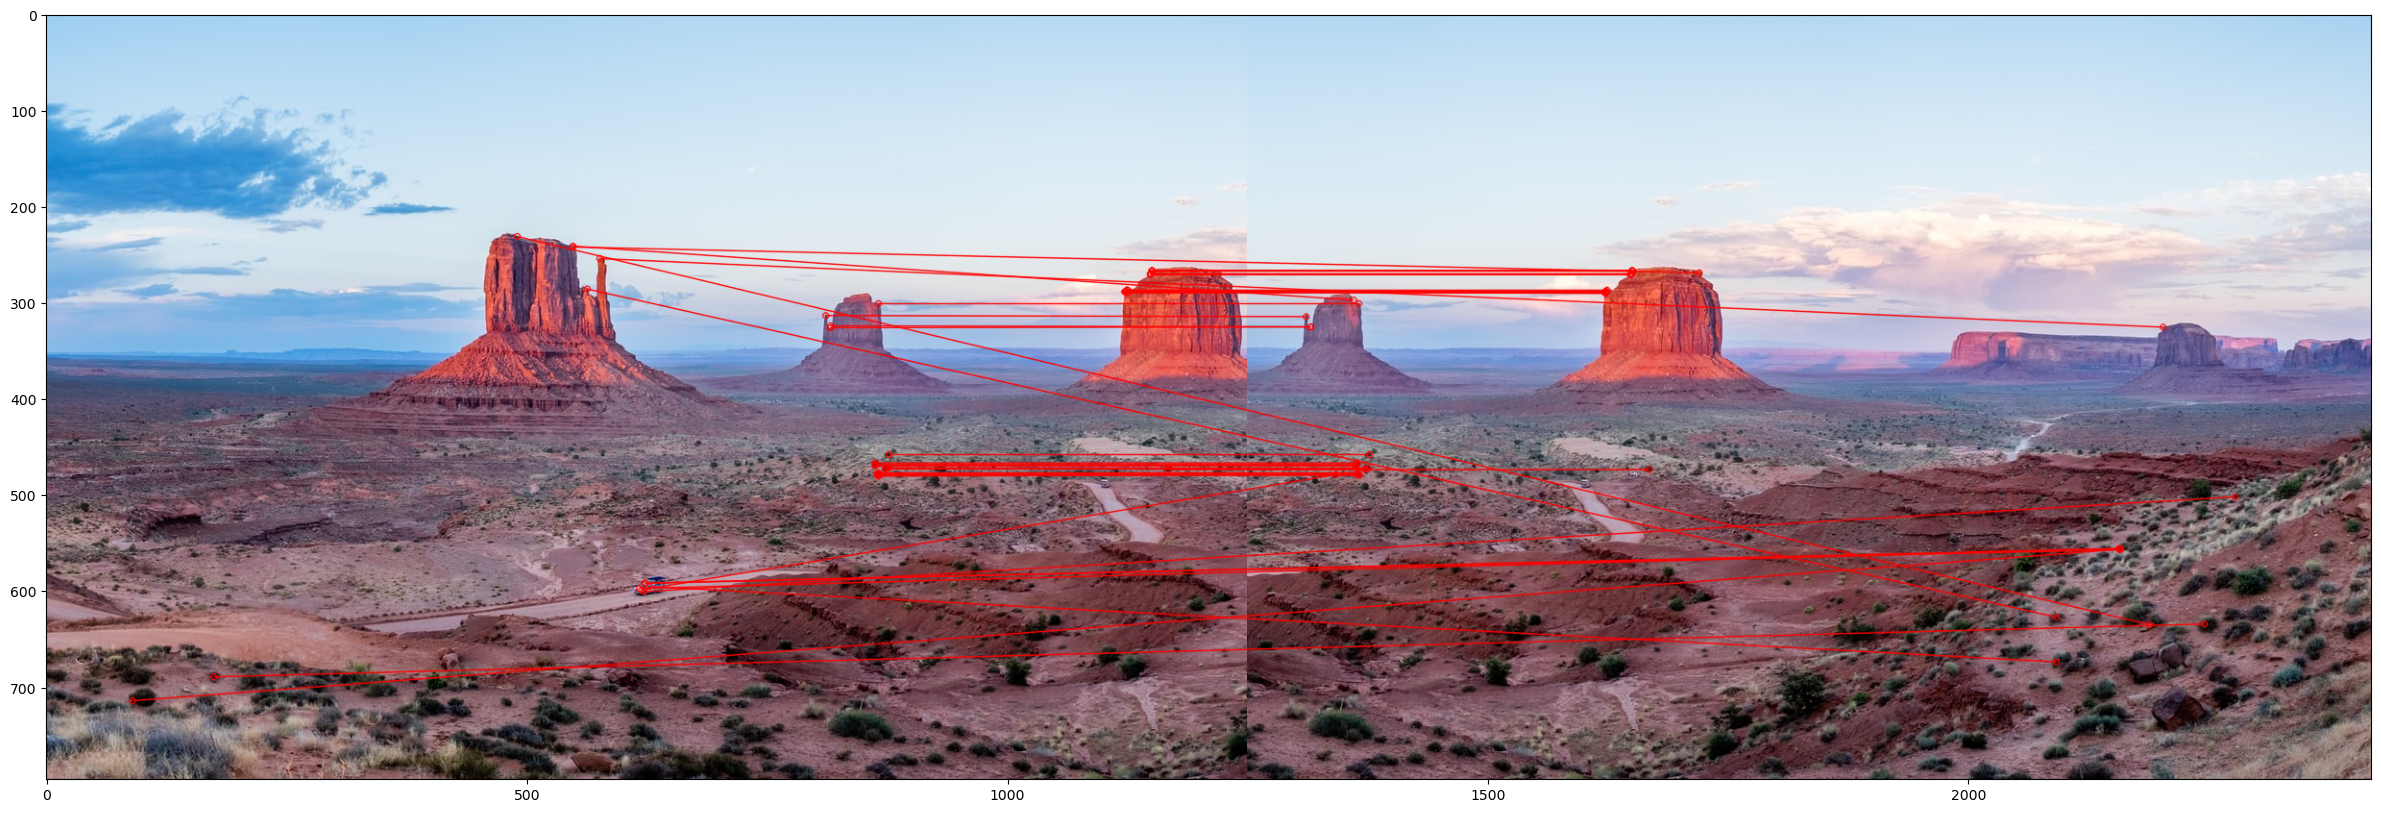

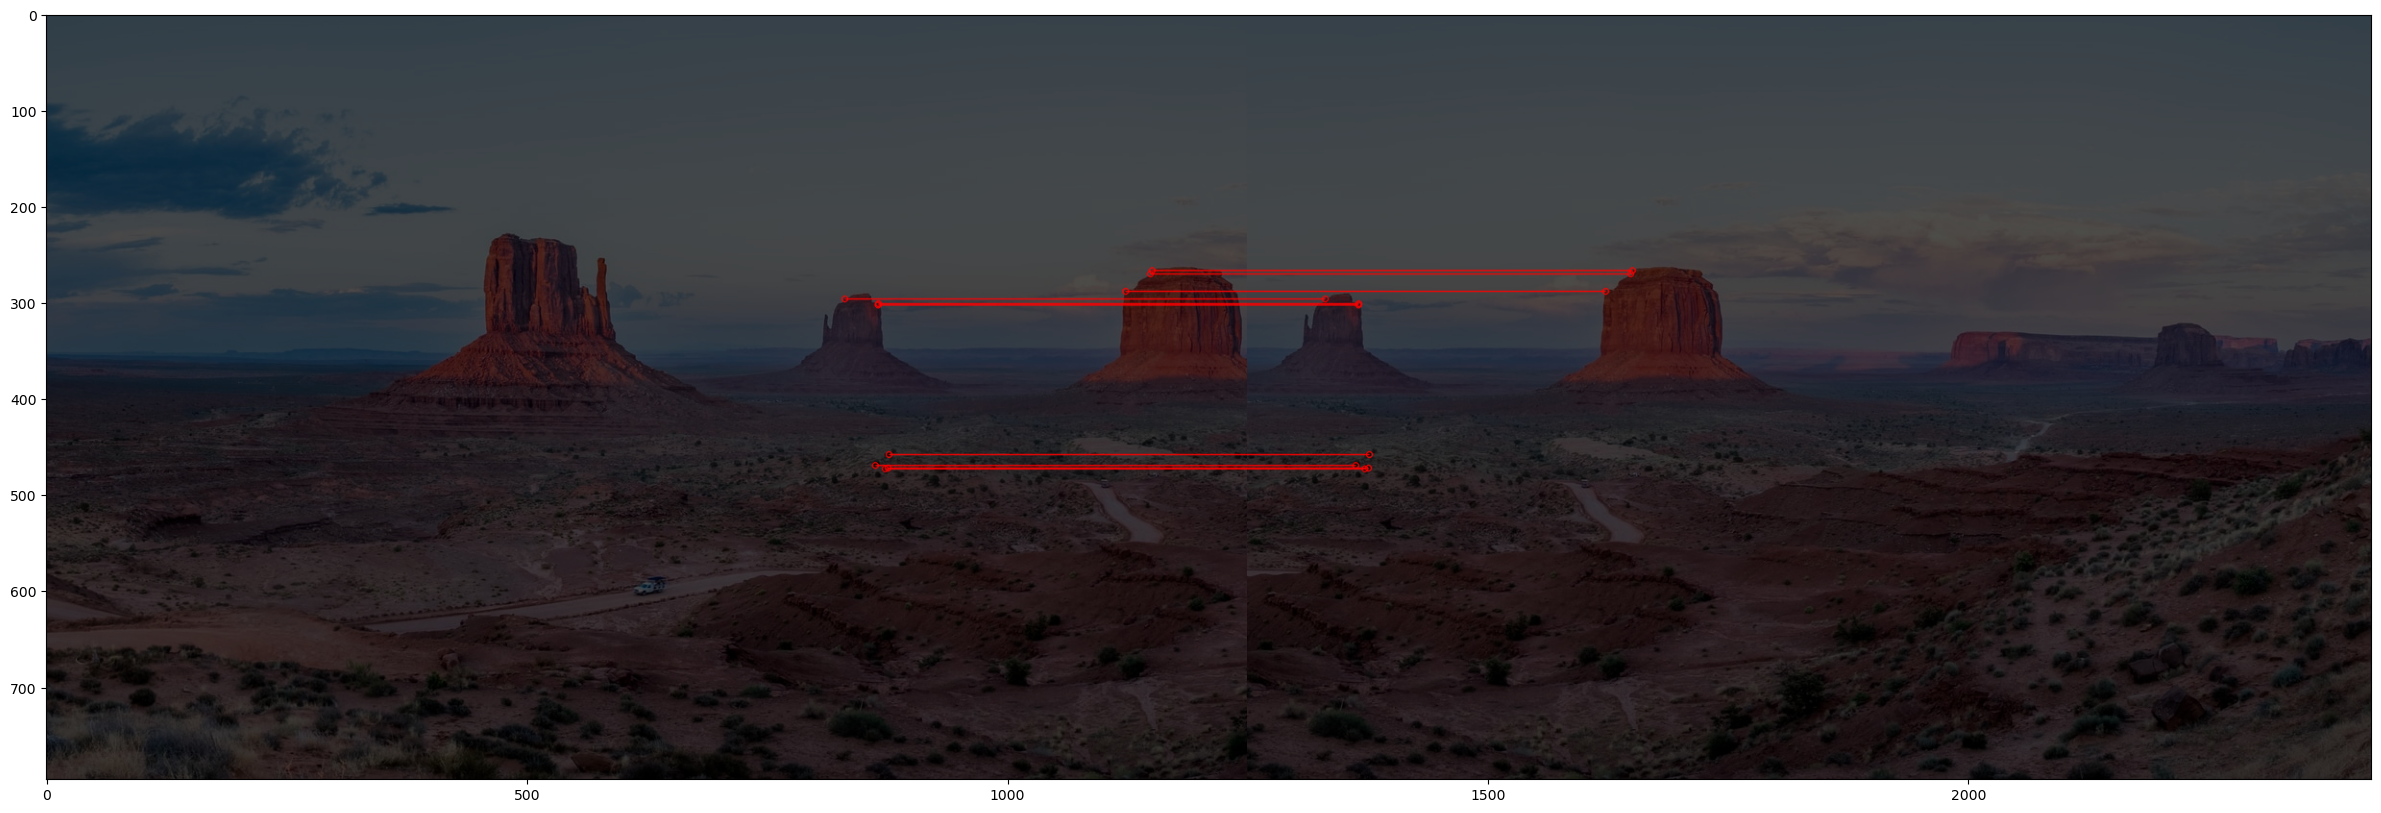

In [67]:
orb_detector = create_orb_detector(100)
image_with_matches = match_images('src_left.jpg', 'src_right.jpg', orb_detector)
plt.figure(figsize=(30,20))
plt.imshow(cv2.cvtColor(image_with_matches, cv2.COLOR_BGR2RGB))
plt.show()

compare_orb_performance('src_left.jpg','src_right.jpg', orb_detector)
